In [14]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

In [15]:
import mnist
import micronn as mn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

np.set_printoptions(suppress=True)

In [16]:
train_img, train_label = mnist.train_images(), mnist.train_labels()
test_img, test_label = mnist.test_images(), mnist.test_labels()

print(train_img.shape, train_label.shape)
print(train_label.shape, test_label.shape)

(60000, 28, 28) (60000,)
(60000,) (10000,)


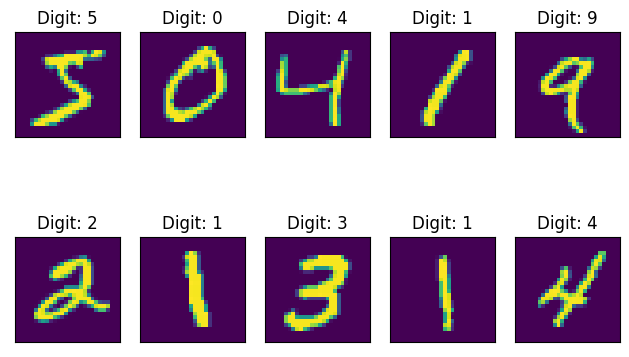

In [17]:
fig, axes = plt.subplots(2, 5)

for ax, i in zip(axes.ravel(), range(10)):
    ax.imshow(train_img[i])
    ax.set_title(f'Digit: {train_label[i]}')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()

In [18]:
# (60000, 28, 28) --> (60000, 28 x 28)
x_train = train_img.reshape((train_img.shape[0], train_img.shape[1] * train_img.shape[2]))
x_test = test_img.reshape((test_img.shape[0], test_img.shape[1] * test_img.shape[2]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalization
x_train /= 255
x_test /= 255

In [19]:
# the encoder expect value with 2 dimension
encoder = OneHotEncoder()
encoder = encoder.fit(train_label.reshape((-1, 1)))

y_train = encoder.transform(train_label.reshape((-1, 1))).toarray()
y_test = encoder.transform(test_label.reshape((-1, 1))).toarray()

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [21]:
net = [
    mn.Dense(128, mn.Relu()),
    mn.Dense(256, mn.Relu()),
    mn.Dense(10, mn.Softmax())
]

model = mn.Model(net, mn.CategoricalCrossentropy(), mn.Adam())

In [22]:
model.fit(x_train, y_train, batch_size=64, epochs=10)

100%|██████████| 10/10 [01:30<00:00,  9.03s/it]


Text(0, 0.5, 'Loss')

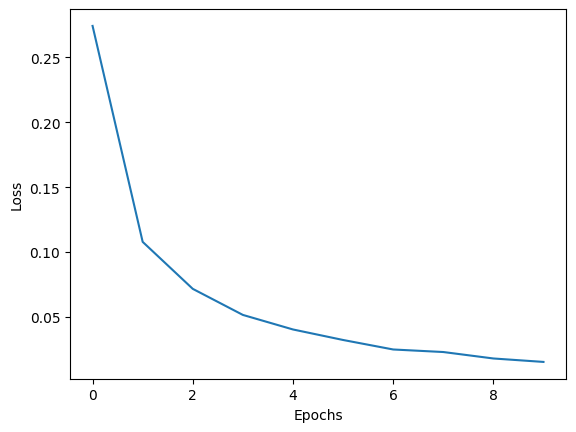

In [23]:
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [24]:
y_pred = model.predict(x_test).T
y_pred.shape

(10000, 10)

In [25]:
def accuracy(y_test, y_pred):
    boolean = np.argmax(y_test, axis=1) == np.argmax(y_pred, axis=1)
    _, number = np.unique(boolean, return_counts=True)

    # the number of true divide by total number of datasets
    return number[-1] / 10000 * 100

print(f'The accuracy is {accuracy(y_test, y_pred)} %')


The accuracy is 98.11999999999999 %


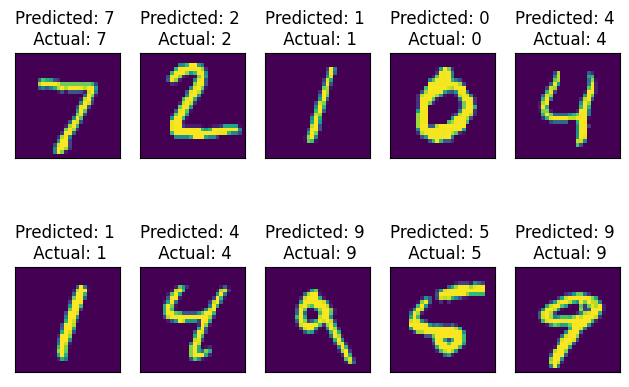

In [26]:
fig, axes = plt.subplots(2, 5)

for ax, i in zip(axes.ravel(), range(10)):
    ax.imshow(test_img[i])
    ax.set_title(f'Predicted: {np.argmax(y_pred[i])} \n Actual: {test_label[i]}')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()